# <span style="color:orange;">**💸 Loan Default Prediction**</span>


___Project Domain : Finance___

----------------------------------------------------------------------------------------------------------------

___Goal of the Project:___

 - _This Project is about building a predictive model which assists the ***money lenders(financial loan services)*** to decrease or to avoid  the risks of loan defaults._
 - _The goal is to build a binary classification model which predicts whether the customer will default their loan or not._
 - _The dataset is taken from [kaggle](https://www.kaggle.com/datasets/nikhil1e9/loan-default),which contains required amount of datapoints to train and build a machine learning model._


![](https://img.freepik.com/free-vector/bank-loan-isometric-composition-with-icons-contract-credit-card-with-stationery-items-people-illustration_1284-62206.jpg?w=740&t=st=1709882122~exp=1709882722~hmac=9d67cbef7b3de5fc4395c2d6bd5cf69b67257d7529b868be4bbcec772b40bef4)

___Image Credits : [Freepik](https://www.freepik.com/)___

#### ___Load dataset:___

In [202]:
#Import neceassry libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [203]:
df=pd.read_csv("Loan_default.csv")
pd.set_option("display.max_columns",None)
print("Shape of the dataset :",df.shape)
df.head()

Shape of the dataset : (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


___Column Description :___

- LoanID - A unique identifier for each loan.
- Age - The age of the borrower.
- Income -  The annual income of the borrower.
- LoanAmount -  The amount of money being borrowed.
- CreditScore -The credit score of the borrower, indicating their creditworthiness.
- MonthsEmployed -  The number of months the borrower has been employed.
- NumCreditLines -  The number of credit lines the borrower has open.
- InterestRate -  The interest rate for the loan.
- Loan Term -  The term length of the loan in months.
- DTIRatio -  The Debt-to-Income ratio, indicating the borrower's debt compared to their income.
- Education - The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).
- EmploymentType - The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).
- Marital Status -  The marital status of the borrower (Single, Married, Divorced).
- HasMortgage -  Whether the borrower has a mortgage (Yes or No).
- HasDependents - Whether the borrower has dependents (Yes or No).
- LoanPurpose - The purpose of the loan (Home, Auto, Education, Business, Other).
- HasCoSigner -  Whether the loan has a co-signer (Yes or No).
- Default - The binary target variable indicating whether the loan defaulted (1) or not (0).





In [204]:
#Checking for duplicates
print(df.duplicated().sum())
#----------------------------------
print(df.LoanID.duplicated().sum())

0
0


## ___Explorartory Data Analysis (EDA) :___

In [205]:
#Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns


********************************************************************************************************************
**Feature Variables :**
'LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner'.


**Target Variable :**
'Default'

- _With the available feature variables, the target is to be predicted._
********************************************************************************************************************

___Data Information :___

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

___Summary Statistics :___

In [207]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


___Categorical and Numerical Variables :___

 - In this case "NumCreditLines" column is considered as categoriccal column because it has only 4 unique values (1,2,3,and 4)

In [208]:
df["NumCreditLines"].value_counts()

NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64

In [209]:
categorical_variables=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default']
numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio',]

___Checking for Errors in Categorical Variables:___

In [210]:
for variable in categorical_variables:
    print(df[variable].value_counts())
    print("~"*50)

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: i

___Analysing Categorical Variables :___

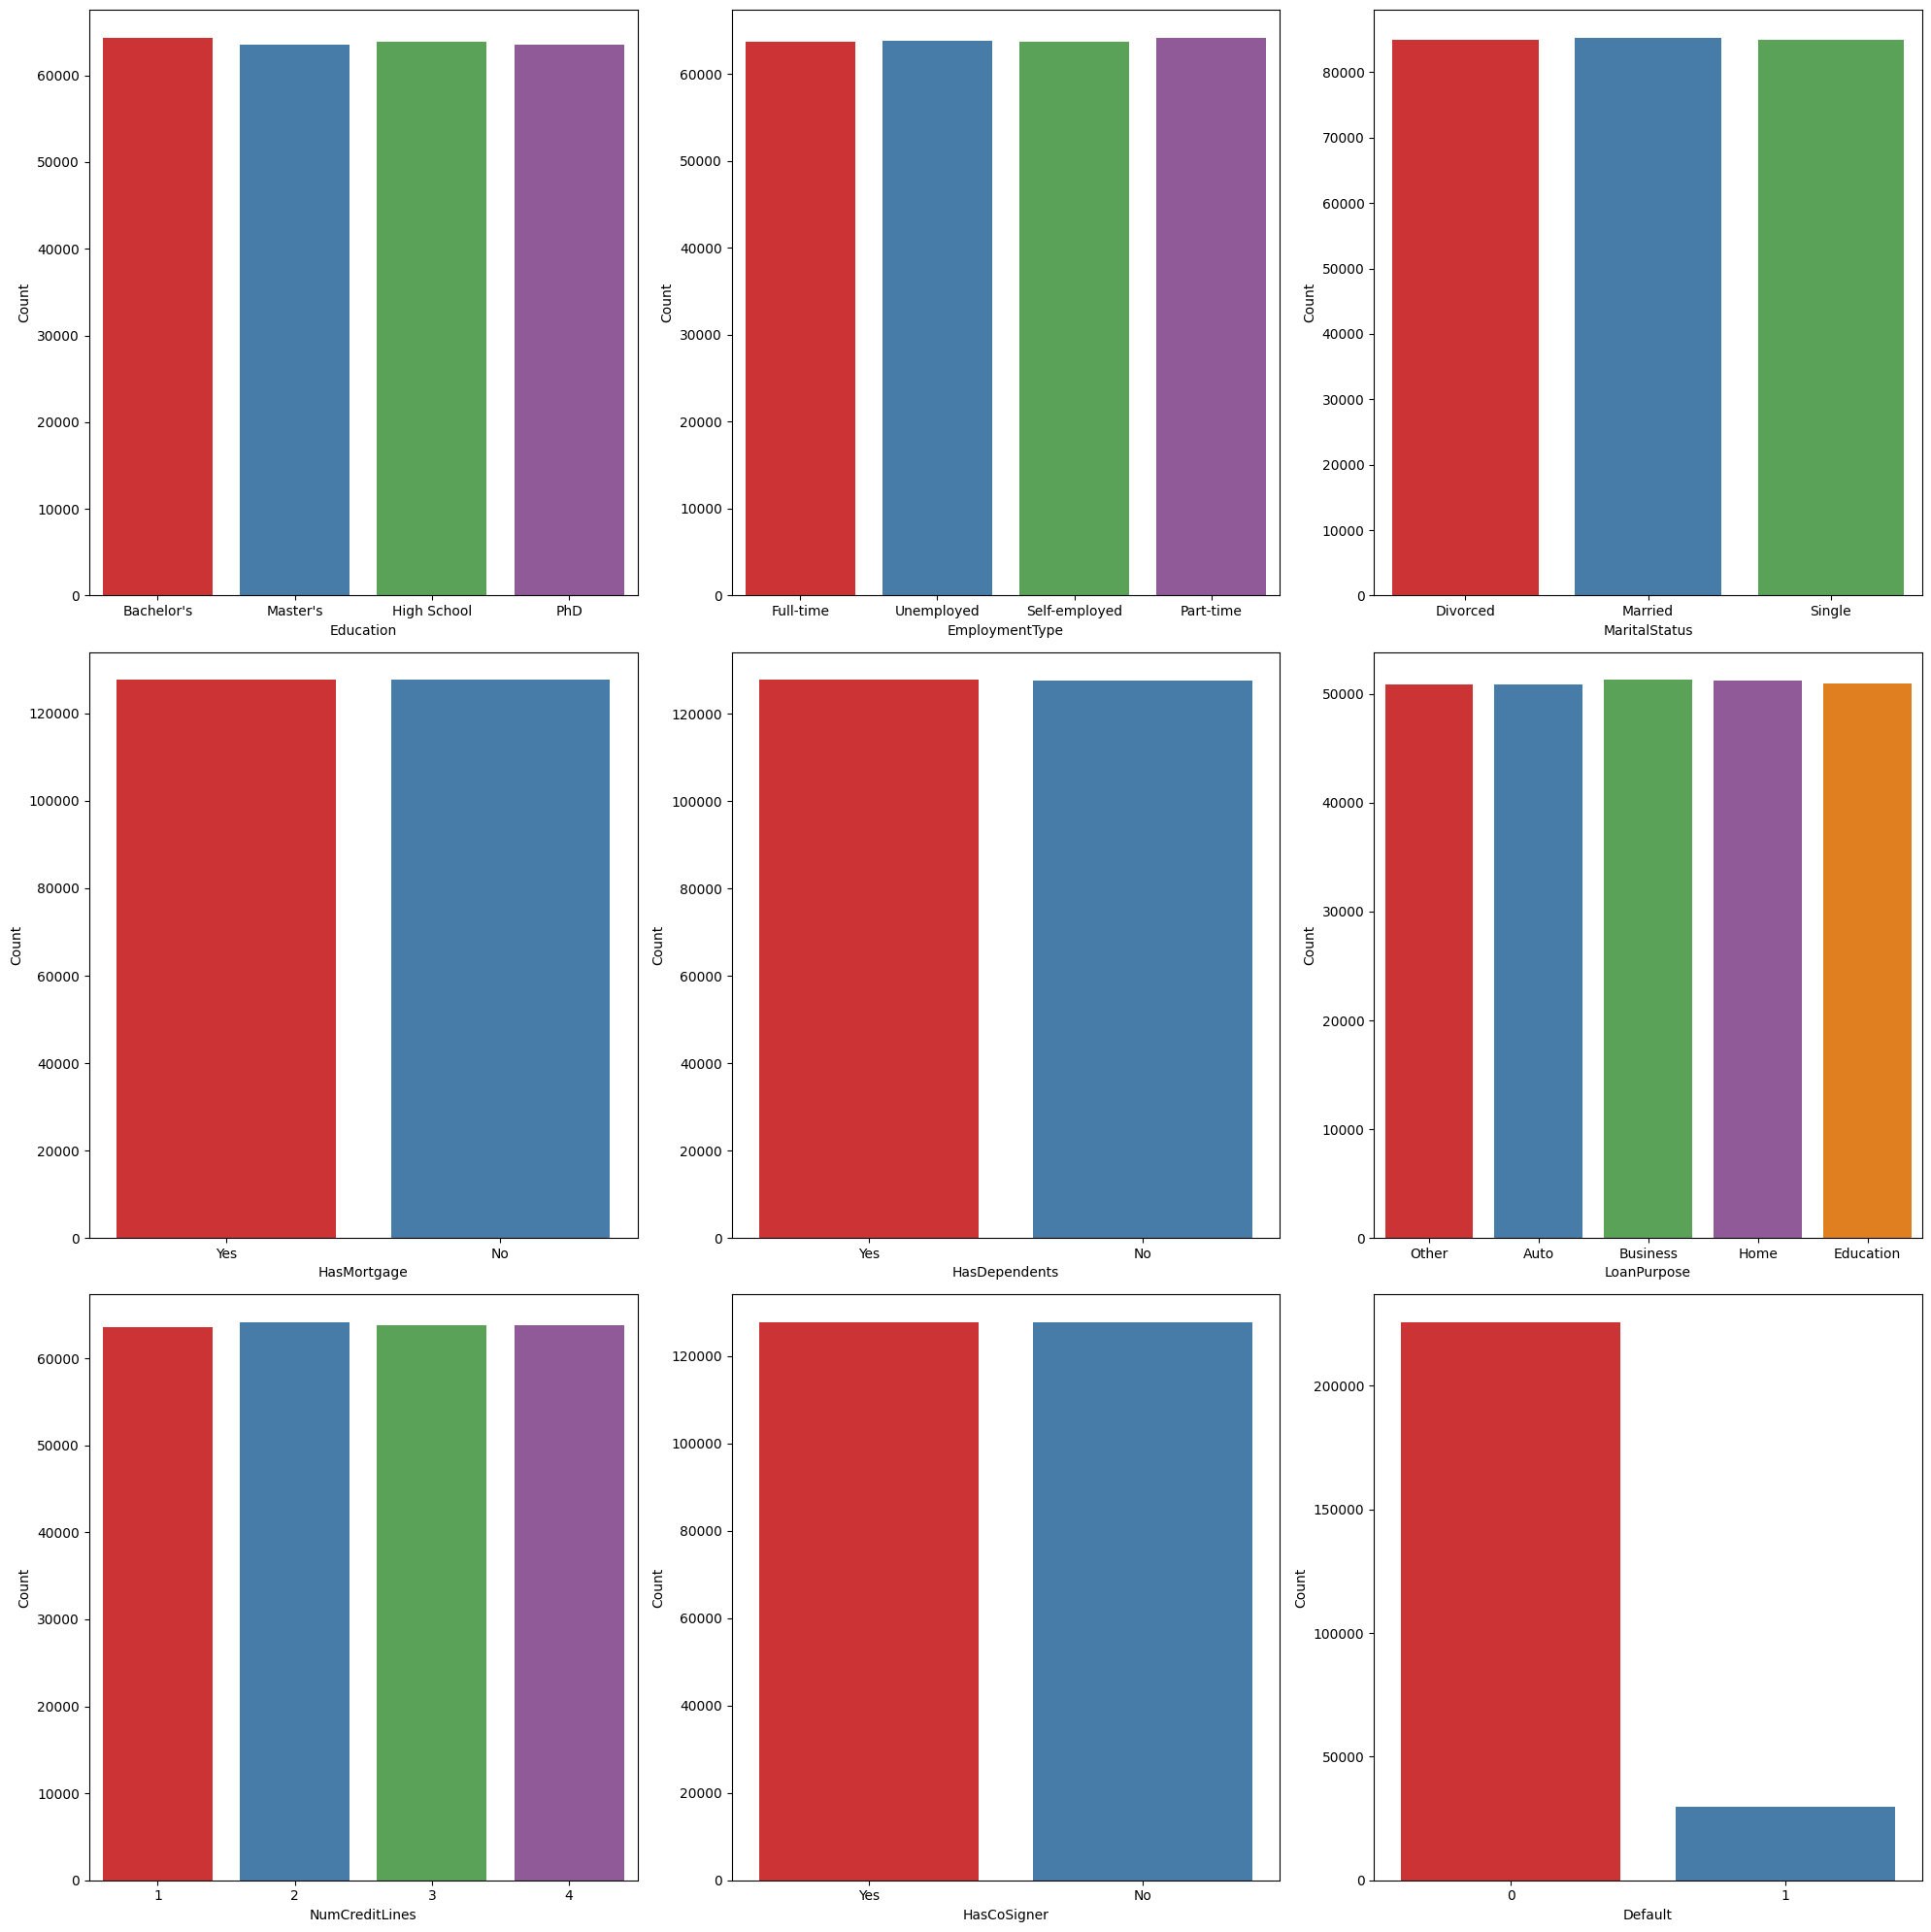

In [211]:
#Count of categories in each variable
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_variables:
    plt.subplot(3,3,ind)
    sns.countplot(x=df[variable],palette='Set1')
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

***Inference :***
- The categories of feature variables are almost  equally distributed.
- In target variable,the classes are imbalanced in which **11.62%** customers defaulted their loan  and **88.38%** customers are not defaulted their loan.

___Comparing the Categorigal Variables with Target :___

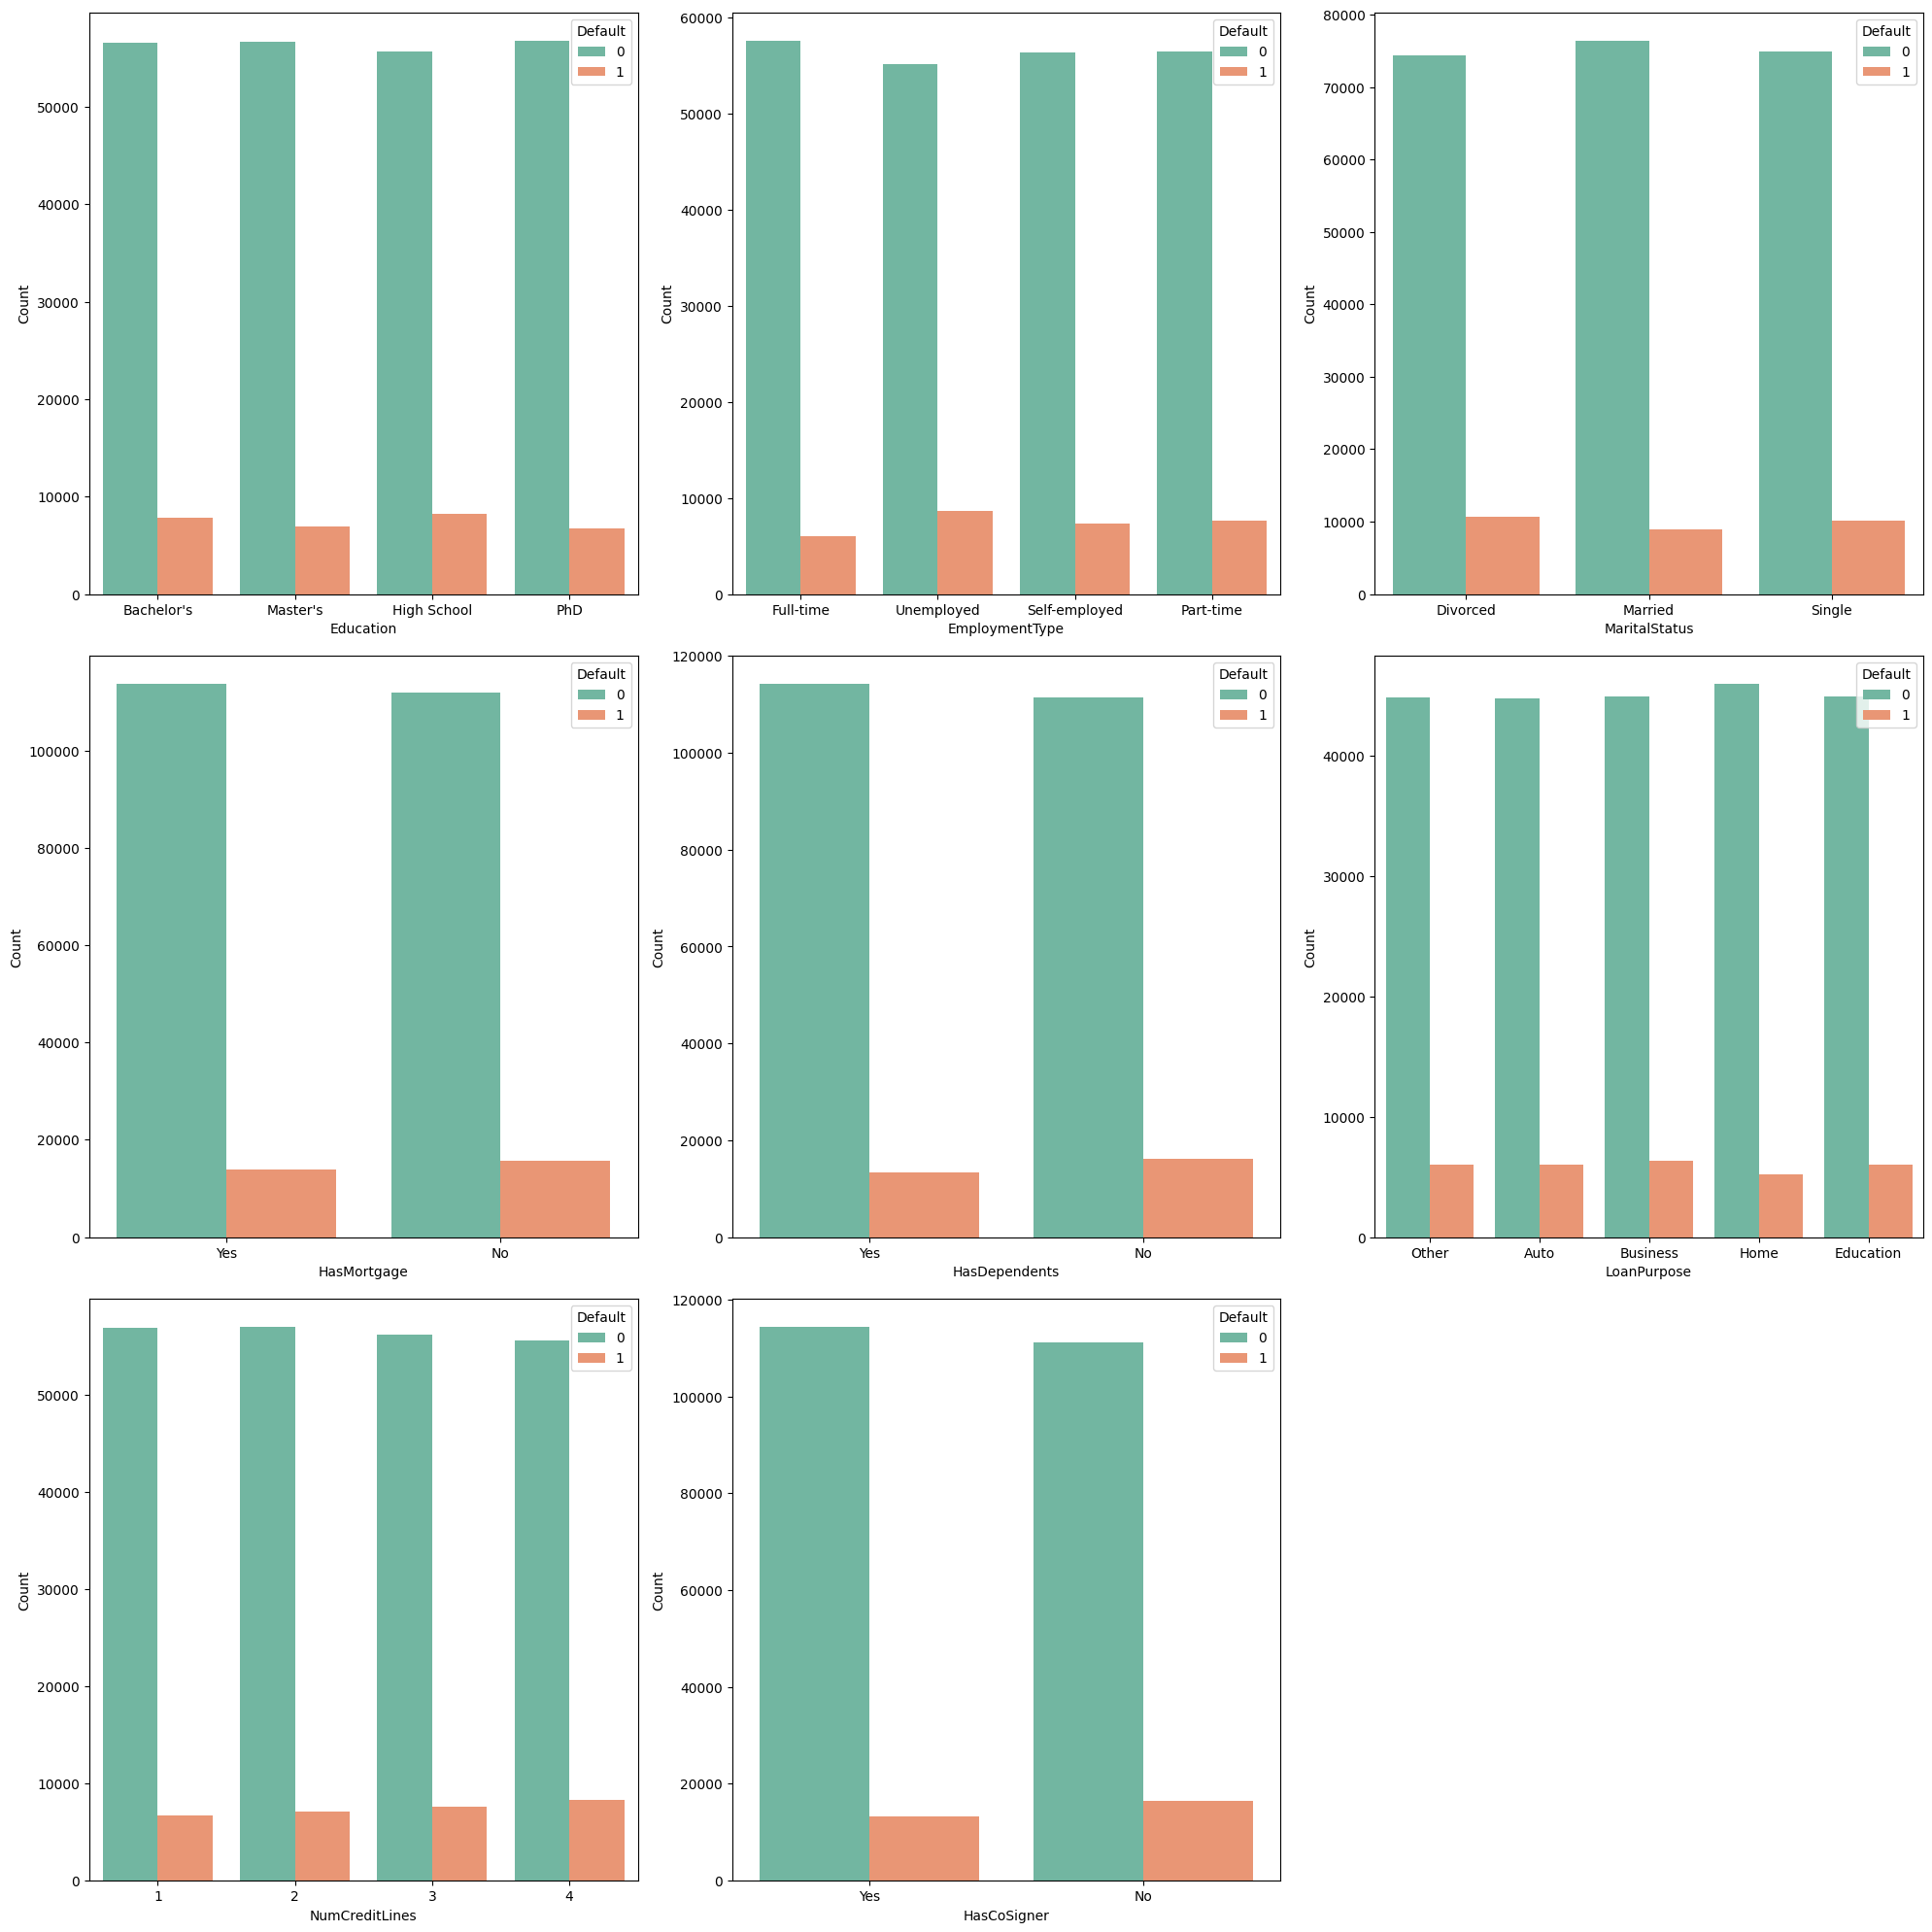

In [212]:
plt.figure(figsize=(20, 20))
ind=1
for variable in categorical_variables[:8]:
    plt.subplot(3,3,ind)
    sns.countplot(x=df[variable],palette='Set2',hue=df["Default"])
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

___Inference :___
- The target variable classes are almost equally distributed among all categories of feature variables.It is a good sign Which indicates each and every feature in the dataset are related with the target.

___Numerical Data Distribution :___

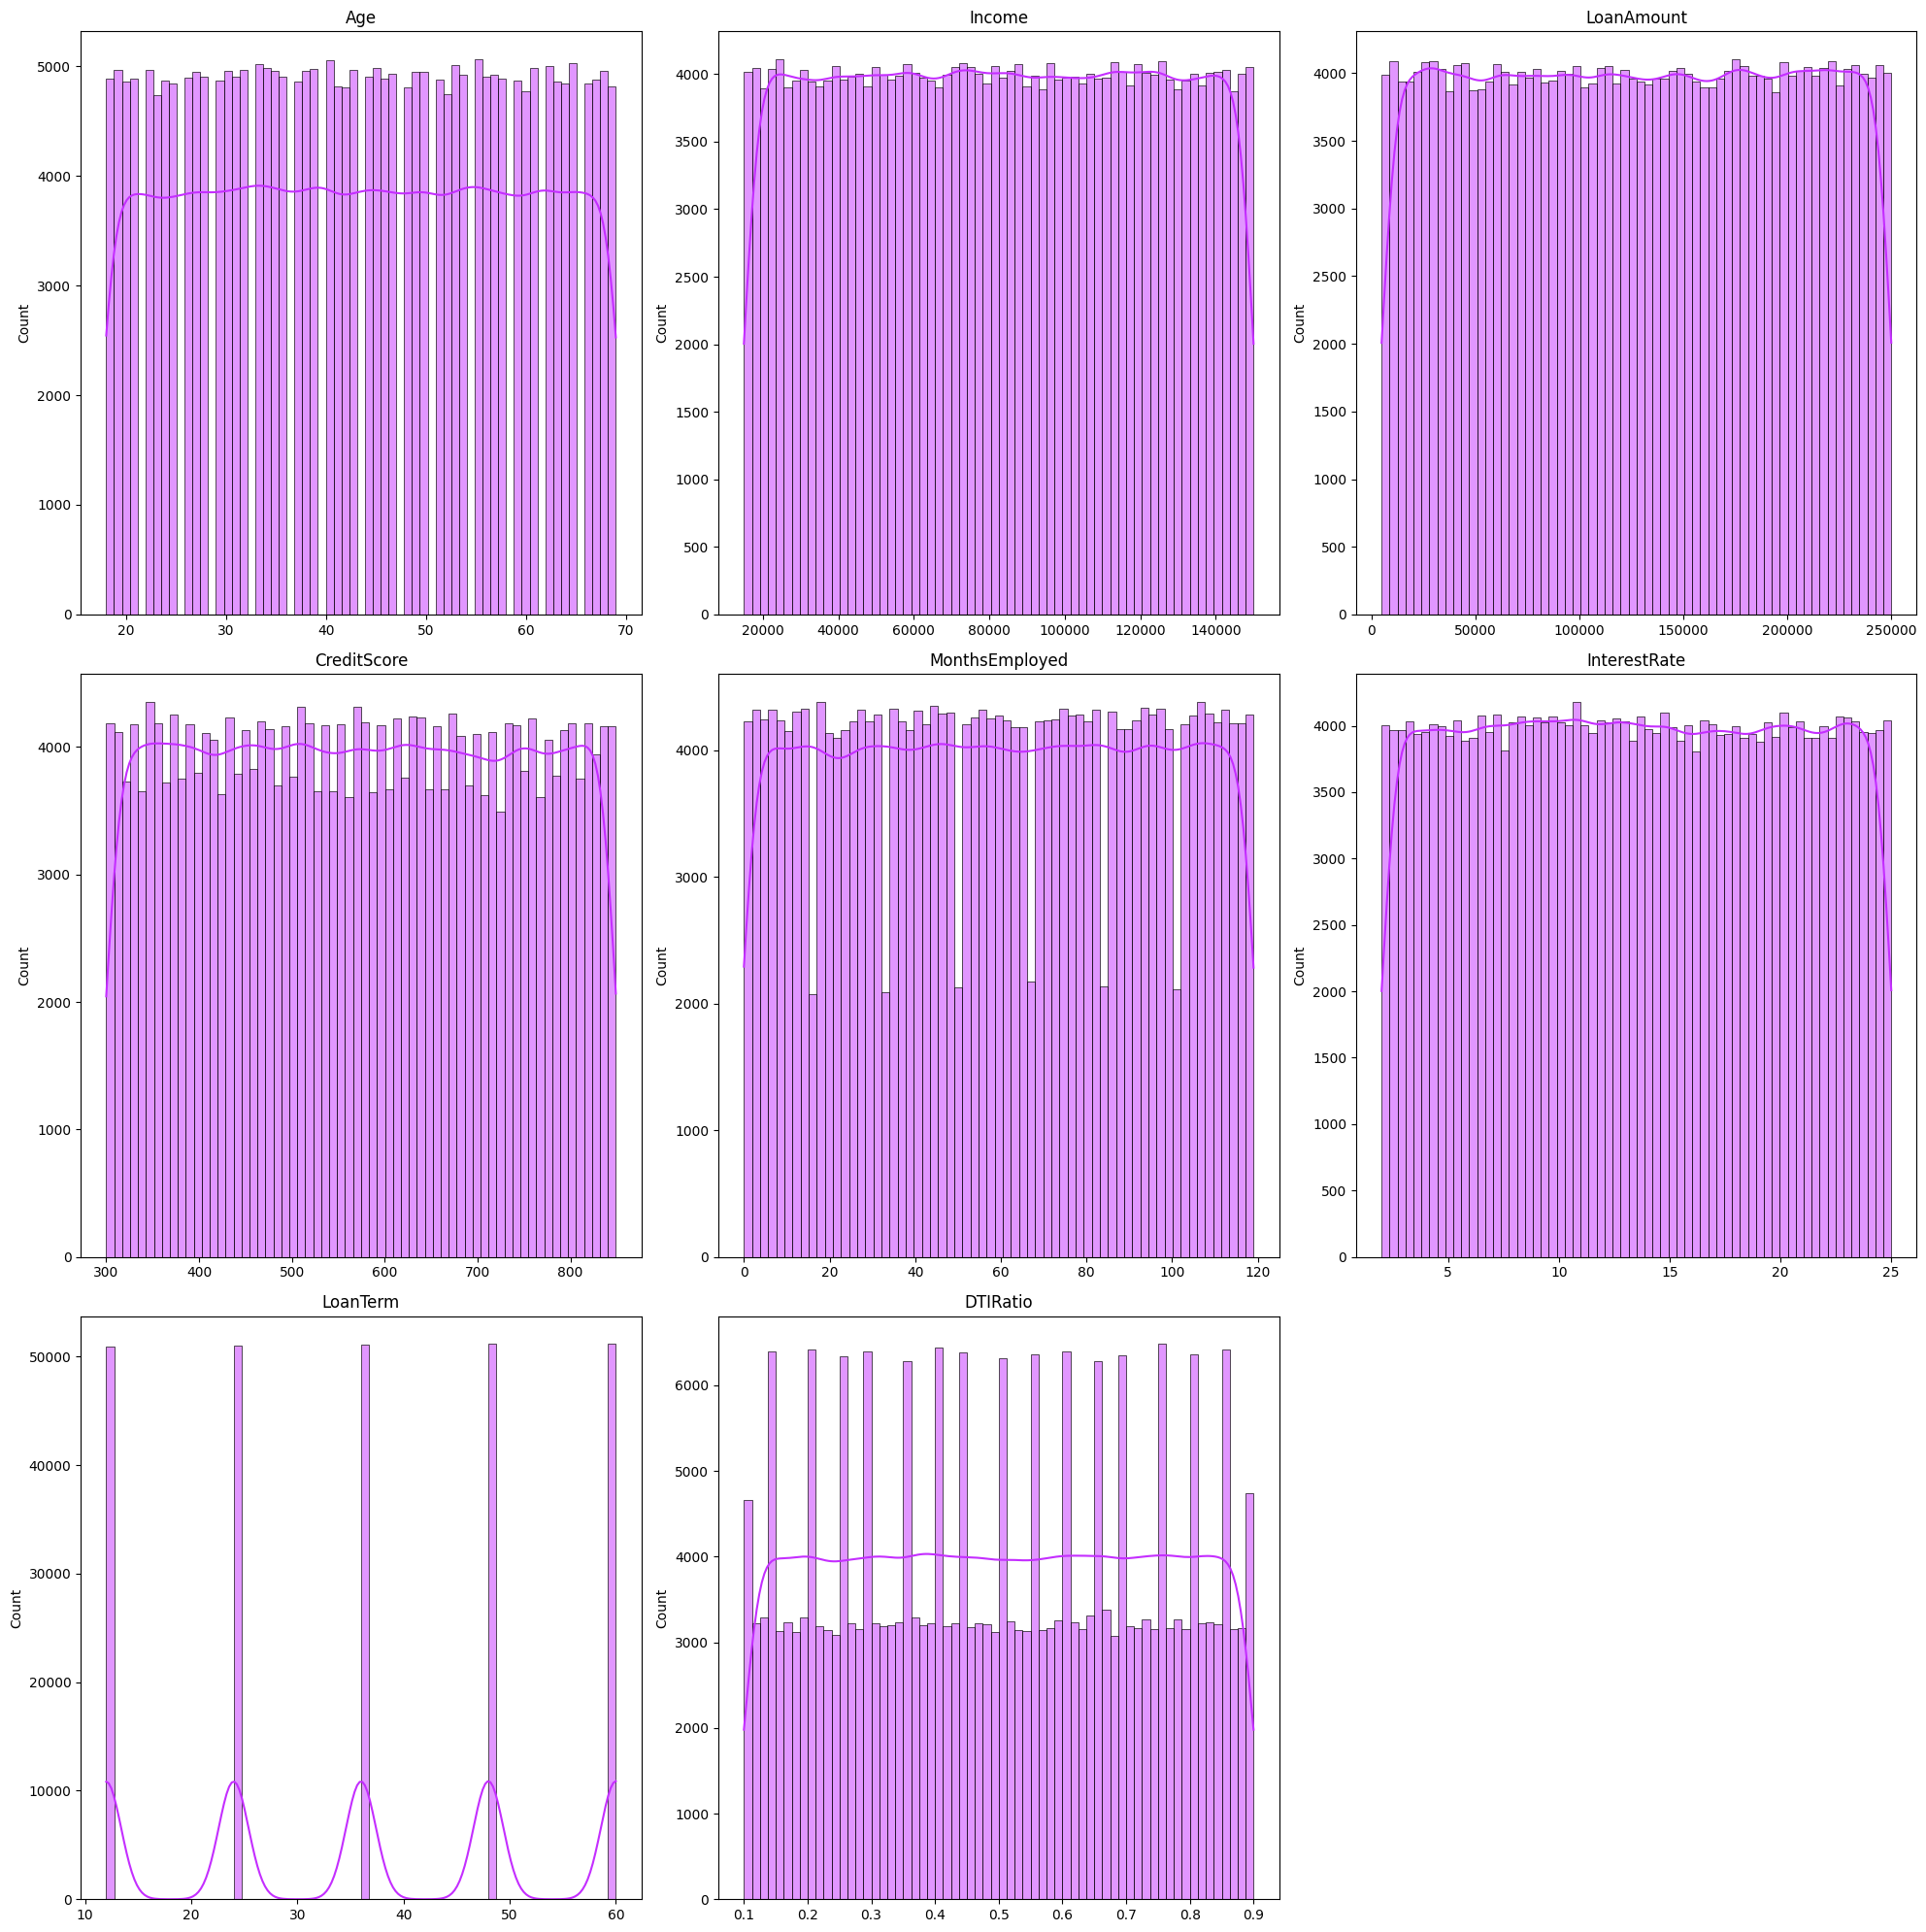

In [213]:
#Data distribution of numerical variables
#Histogram
plt.figure(figsize=(20, 20))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.histplot(x=df[variable],kde=True,color="#c42eff")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

___Checking for Ouliers :___

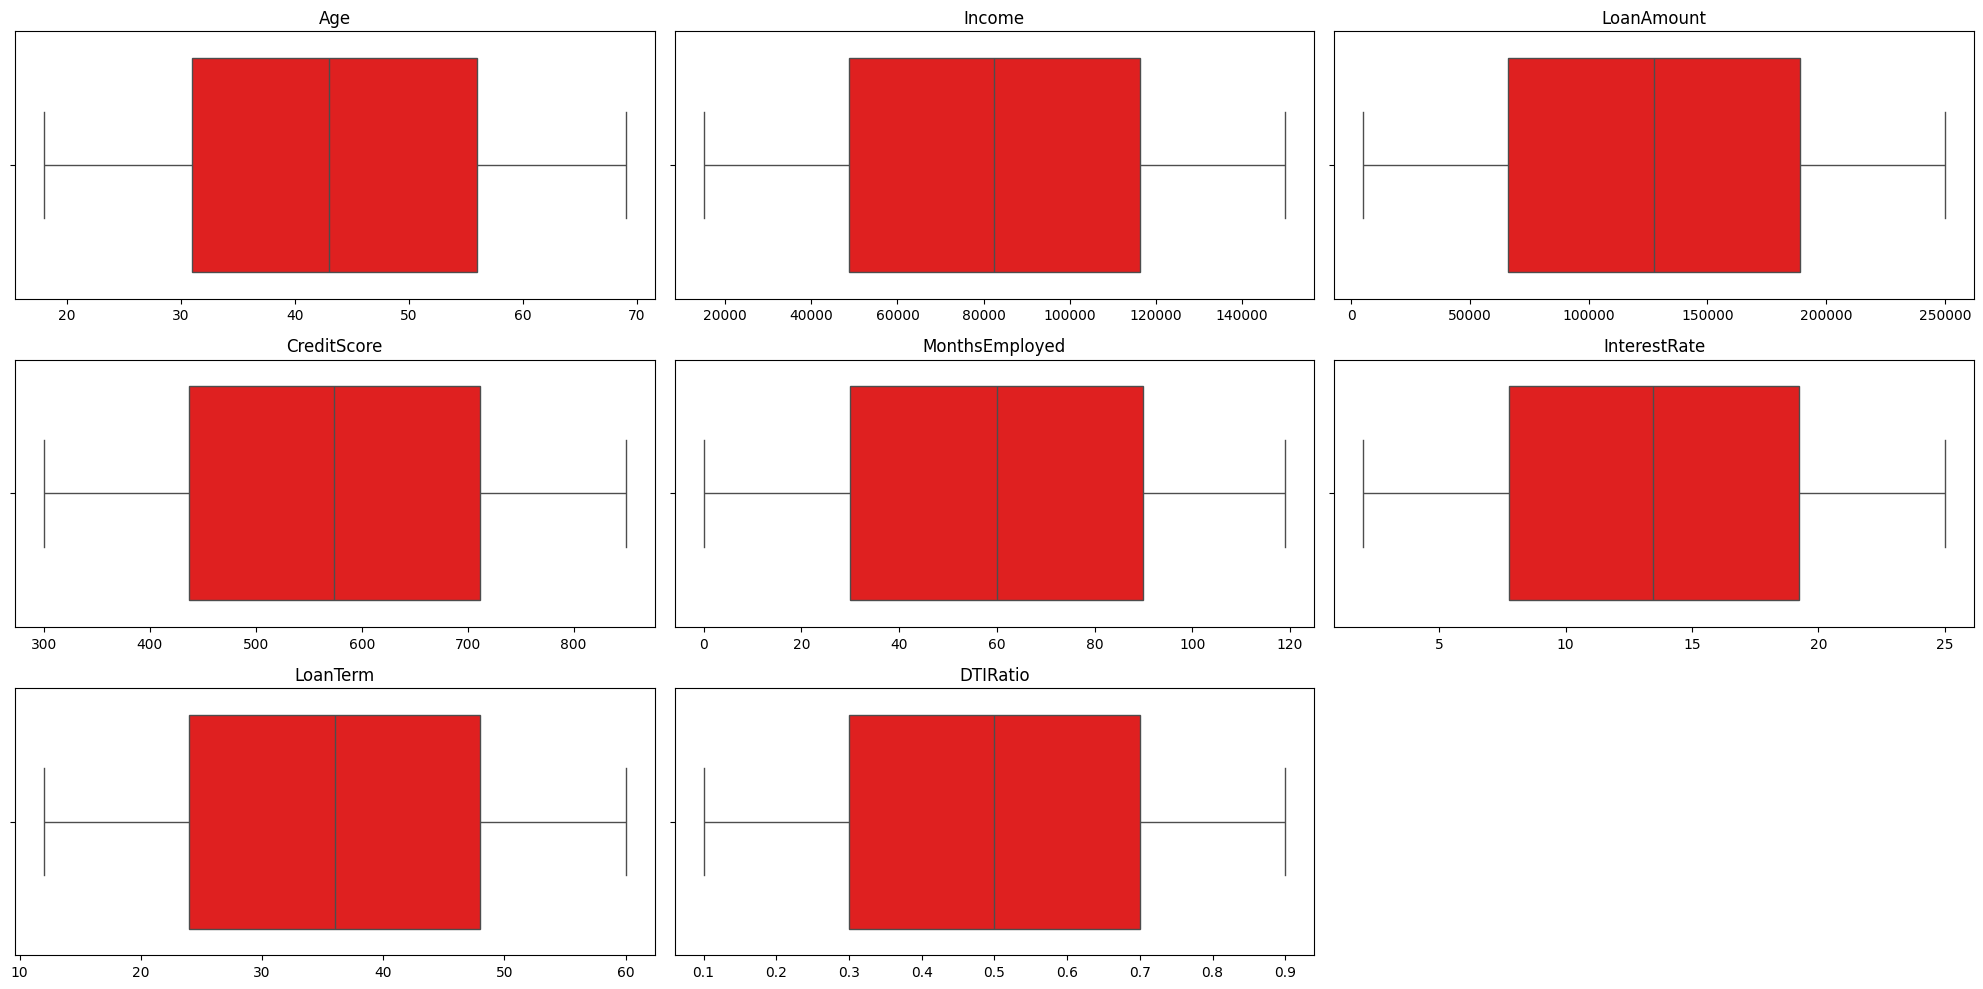

In [214]:
plt.figure(figsize=(20, 10))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=df[variable],color="red")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

___Observation :___
- There is no such data skewness or outliers is seen in the numerical data.

 ___The dataset is free from outliers and skewness so it is ready to build a machine learning model.___

___Correlation Matrix :___

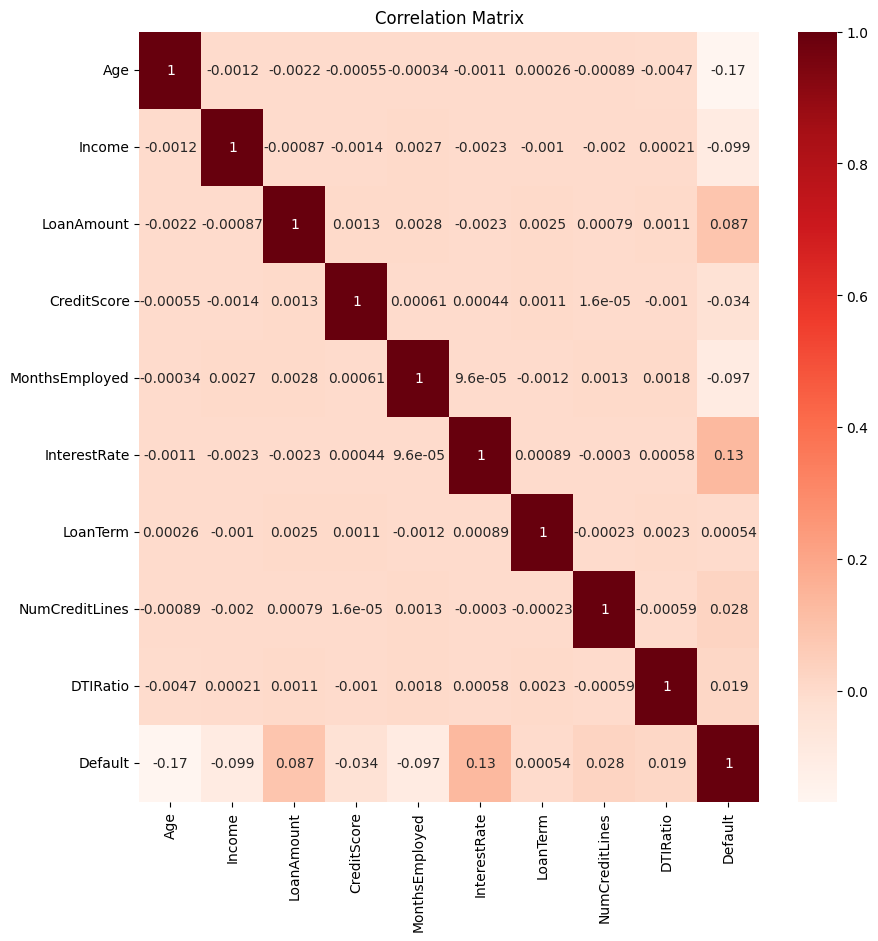

In [215]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm','NumCreditLines' ,'DTIRatio',"Default"]].corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

***Inference :***
- Default and Interest rate are positively correlated (0.13).
- Default and Age are negatively correlated (-0.17).
- "Credit Score" is negatively correlated with Loan default.

___Encode Categorical columns :___

In [216]:
#Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

In [217]:
#Taking a copy of  dataframe
df_2=df.copy()

In [218]:
columns_to_encode = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
#---------------------------------------------------------------------------------------------
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df_2[columns_to_encode])
#--------------------------------------------------------------------------------------------
encoded_feature_names = encoder.get_feature_names_out(input_features=columns_to_encode)
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names)
#--------------------------------------------------------------------------------------------
#Dropping the categorical column
df_2.drop(columns=columns_to_encode, inplace=True)
#--------------------------------------------------------------------------------------------
#Concat the dataframes together
df_2 = pd.concat([df_2, encoded_df], axis=1)

In [219]:
print("Shape of the data after encoding :",df_2.shape)
df_2.head(2)

Shape of the data after encoding : (255347, 33)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,EmploymentType_Full-time,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_No,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


--------------------------------------------------------------------------------------------------------------------
## ***Machine Learning:***

#### ___Feature Selection:___

- _Since there are "33" feature variables are vailable to predict the target.Let's compute "Principal Component Analysis(PCA)" to reduce the feature size and build the model._

In [220]:
#Filtering the variables:
X=df_2.drop(columns=["LoanID","Default"])
y=df_2["Default"]
print("Shape of the feature variables:",X.shape)
print("Shape of the target variable:",y.shape)

Shape of the feature variables: (255347, 31)
Shape of the target variable: (255347,)


___Checking for Data Imbalance___ :

In [221]:
y.value_counts().to_dict()

{0: 225694, 1: 29653}

There is a class imbalance in this dataset.So that ***"Cross Validation Technique"*** is used  and checked for accuracy.

#### ___Cross Validation :___
- _Using K-Fold Cross Validation to perform cross validation_

_It is a binary classification problem so that the classifications models such as "Decision Tree" ,"Random forest","XGBoost" are choosen and trained._

In [222]:
#Import necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

In [223]:
# Splitting the data for train and test:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [224]:
# 5-Folds Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#-----------------------------------------------------------------------------------------------------------------
#Decision Tree Classifier
dt_classifier= DecisionTreeClassifier(  criterion='gini', 
                                        max_depth=3, 
                                        min_samples_split=2, 
                                        min_samples_leaf=1, 
                                        max_features=None, 
                                        random_state=42)
dt_cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf,scoring="accuracy")
#-----------------------------------------------------------------------------------------------------------------
#Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100,random_state=42)
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=kf,scoring="accuracy")
#-------------------------------------------------------------------------------------------------------------------
#XGBoost Classifier
params = {
    'objective': 'binary:logistic',  
    'eval_metric': 'logloss',       
    'max_depth': 3,                    
    'learning_rate': 0.1,         
    'n_estimators': 100              
}
xgb_classifier = xgb.XGBClassifier(**params)
xgb_cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=kf,scoring="accuracy")

In [225]:
#Cross validation scores
accuracy_data={"Model":["Decision Tree","Random Forest","XGBoost"],
               "Mean Accuracy":[rf_cv_scores.mean(),xgb_cv_scores.mean(),dt_cv_scores.mean()],
               "Standard Deviation" :[rf_cv_scores.std(),xgb_cv_scores.std(),dt_cv_scores.std()]}
cv_scores=pd.DataFrame(accuracy_data)
cv_scores

,Model,Mean Accuracy,Standard Deviation
0,Decision Tree,0.885234,0.000595
1,Random Forest,0.885787,0.000444
2,XGBoost,0.883722,0.000465


___Principal Component Analysis (PCA) :___
- _PCA is done to reduce dimension of the feature variables by selecting the best features._

In [227]:
#Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [228]:
#Taking a copy of  test and train data of X and y
X_train_temp=X_train.copy()
X_test_temp=X_test.copy()
y_train_temp=y_train.copy()
y_test_temp=y_test.copy()
#---------------------------------------------------
#Scaling the data using standard scalar
sc_temp = StandardScaler()
X_train_temp = sc_temp.fit_transform(X_train_temp)
X_test_temp= sc_temp.transform(X_test_temp)

#---------------------------------------------------
#PCA
#Initially ,assign the number of components to "None"
pca_temp = PCA(n_components=None)
X_train_temp = pca_temp.fit_transform(X_train_temp)
X_test_temp= pca_temp.transform(X_test_temp)

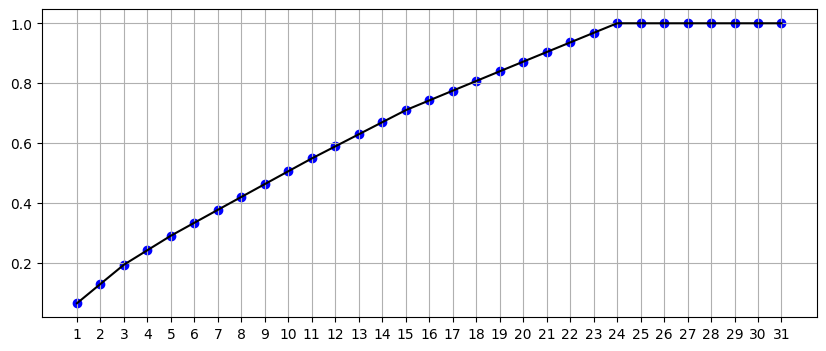

In [229]:
#Variance ratio
explained_variance_ratio = pca_temp.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
#-----------------------------------------------------------------------
#Visualize the Feature size importance
plt.figure(figsize=(10,4))
plt.scatter(range(1,32),cumulative_explained_variance,color="blue")
plt.plot(range(1,32),cumulative_explained_variance,color="black")
plt.xticks(range(1,32))
plt.grid()
plt.show()

___Inference :___
- __By seeing the graph it is infered that the component size can be reduced  upto  "23".__


-------------------------------------------------------------------------------------------------------------------
#### ___Building ML Model :___
- _Selecting and training the optimal model._

___Comparing Test and Train accuracy of the different Models :___

In [230]:
#Import necessary Libraries
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [231]:
# Splitting the data for training and testing with startification:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [232]:
#Scaling the data using standard scalar
sc= StandardScaler()
X_train_transformed = sc.fit_transform(X_train)
X_test_transformed= sc.transform(X_test)
#---------------------------------------------------------
#PCA
pca= PCA(n_components=None)
X_train_transformed= pca.fit_transform(X_train_transformed)
X_test_transformed= pca.transform(X_test_transformed)

In [256]:
#Lists for holding model name,train and test accuracies of model
model_list=["Decision Tree","Random Forest","XGBoost"]
train_accuracy_list=[]
test_accuracy_list=[]

In [257]:
#Decision Tree Classifier

dt_classifier.fit(X_train_transformed,y_train)
#--------------------------------------------------------------------
dt_train_pred = dt_classifier.predict(X_train_transformed)
dt_test_pred = dt_classifier.predict(X_test_transformed)
#-------------------------------------------------------------------
dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
#-------------------------------------------------------------------
train_accuracy_list.append(dt_train_accuracy)
test_accuracy_list.append(dt_test_accuracy)

In [258]:
#Random Forest Classifier

rf_classifier.fit(X_train_transformed,y_train)
rf_train_pred=rf_classifier.predict(X_train_transformed)
rf_test_pred=rf_classifier.predict(X_test_transformed)
#-------------------------------------------------------------------
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
#-------------------------------------------------------------------
train_accuracy_list.append(rf_train_accuracy)
test_accuracy_list.append(rf_test_accuracy)

In [259]:
#XGBoost Classifier

xgb_classifier .fit(X_train_transformed,y_train)
#------------------------------------------------------------
xgb_train_pred=xgb_classifier .predict(X_train_transformed)
xgb_test_pred=xgb_classifier .predict(X_test_transformed)
#------------------------------------------------------------
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
#------------------------------------------------------------
train_accuracy_list.append(xgb_train_accuracy )
test_accuracy_list.append(xgb_test_accuracy)

In [255]:
df_accuracy=pd.DataFrame({"Model":model_list,"Train Accuracy":train_accuracy_list,"Test Accuracy":test_accuracy_list,"Change in Accuracy":[abs(x - y) for x, y in zip(train_accuracy_list, test_accuracy_list)]})
df_accuracy

,Model,Train Accuracy,Test Accuracy,Change in Accuracy
0,Decision Tree,0.999985,0.884649,0.115337
1,Random Forest,0.885308,0.884805,0.000503
2,XGBoost,0.885308,0.884805,0.000503


***Observation :***
- The difference between the train and test accuracy of Decision Tree model is round 10%.It's train accuracy is 0.99 and test accuracy is 0.88 which indicates the model prone to overfitting.So the Random Forest model is not considered as a good model.The accuracy of Random Forest and XGBoost are almost similar.Here  "XGBoost Classifier" model  is considered for training and predicting the output .

___Training the "XGBoost Classifier" Model with different PCA components:___

In [260]:
#list to store accuracy
accuracy_list=[]
#Taking  different components
pca_components_list=[31,27,24,23,22,20]

In [261]:
#Scaling
sc= StandardScaler()
X_train_final= sc.fit_transform(X_train)
X_test_final= sc.transform(X_test)
#----------------------------------------------------------------------
for component in pca_components_list:
        pca= PCA(n_components=component)
        X_train_final = pca.fit_transform(X_train_final)
        X_test_final = pca.transform(X_test_final)
        #--------------------------------------------------------------
        xgb_classifier.fit(X_train_final,y_train)
        prediction=xgb_classifier.predict(X_test_final)
        accuracy=accuracy_score(y_test, prediction)
        f1=f1_score(y_test, prediction)
        if component==31:
                print("Classification Report :")
                print(classification_report(y_test, prediction))
                print("~"*100)
        #--------------------------------------------------------------
        print(f"Component size :{component} -> Accuracy : {round(accuracy,4)} -> F1 Score {round(f1,2)}")
        # accuracy_list.append(accuracy_score(y_train, prediction))

Classification Report :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.64      0.02      0.04      5931

    accuracy                           0.88     51070
   macro avg       0.76      0.51      0.49     51070
weighted avg       0.86      0.88      0.83     51070

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Component size :31 -> Accuracy : 0.8848 -> F1 Score 0.04
Component size :27 -> Accuracy : 0.8848 -> F1 Score 0.04
Component size :24 -> Accuracy : 0.8848 -> F1 Score 0.04
Component size :23 -> Accuracy : 0.8847 -> F1 Score 0.03
Component size :22 -> Accuracy : 0.8847 -> F1 Score 0.03
Component size :20 -> Accuracy : 0.8839 -> F1 Score 0.0


___Actual class vs Predicted class :___

In [276]:
#Scaling
sc_ap= StandardScaler()
X_train_ap= sc_ap.fit_transform(X_train)
X_test_ap= sc_ap.transform(X_test)
#----------------------------------------------
#PCA
pca= PCA(n_components=31)
X_train_ap = pca.fit_transform(X_train_ap)
X_test_ap = pca.transform(X_test_ap)
#------------------------------------------------
#Fitting with model
xgb_classifier.fit(X_train_ap,y_train)
xgb_prediction=xgb_classifier.predict(X_test_ap)
xgb_output= pd.DataFrame({'Actual': y_test, 'Predicted': xgb_prediction})
xgb_output.sample(10)

,Actual,Predicted
152836,1,0
168553,0,0
78940,0,0
47633,0,0
156282,0,0
11403,0,0
202612,0,0
229105,0,0
13548,0,0
192497,0,0


***Observation :***

- F1 score of 0.04 suggests that the model's performance in terms of precision and recall is very poor.
- The model may have low precision and recall, meaning it is making many mistakes in identifying true positives and avoiding false positives.
- It  also indicates class imbalance issues, where the model struggles to correctly classify the minority class.

##### ___Suggestions :___

- ***In future, it is suggested to pick different models and train them  with well balanced data to increase model's Accuracy and F1 score.***


----------------------------------------------------------------------------------------------------------------
## ___Experiment :___

_Trying to train the model with balanced data by reducing the class with more data._

In [317]:
#Copy of dataframe
df_3=df_2.copy()
df_3.head(1)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,EmploymentType_Full-time,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_No,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [325]:
#Taking only rows with Loan Defaults
df_A=df_3[df_3["Default"]==1]
print(df_A.shape)
#-------------------------------------------------------------------
#Randomly selects rows without Loan Defaults
df_B=df_3[df_3["Default"]==0].sample(df_A.shape[0],random_state=23)
print(df_B.shape)
#------------------------------------------------------------------
#Concatenate the dataframes 
df_exp=pd.concat([df_A,df_B],axis=0,ignore_index=True)
print(df_exp.shape)
df_exp.head(2)

(29653, 33)
(29653, 33)
(59306, 33)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,EmploymentType_Full-time,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_No,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [326]:
#Selecting the necessary columns
X_exp=df_exp.drop(columns=["LoanID","Default"])
y_exp=df_exp["Default"]
print("Shape of the feature variables:",X_exp.shape)
print("Shape of the target variable:",y_exp.shape)

Shape of the feature variables: (59306, 31)
Shape of the target variable: (59306,)


In [330]:
# Splitting the data for training and testing
X_train_exp,X_test_exp,y_train_exp,y_test_exp = train_test_split(X_exp,y_exp,test_size=0.2,random_state=42)

In [331]:
#Scaling
sc_exp= StandardScaler()
X_train_exp= sc_ap.fit_transform(X_train_exp)
X_test_exp= sc_ap.transform(X_test_exp)
#----------------------------------------------
#PCA
pca= PCA(n_components=31)
X_train_exp = pca.fit_transform(X_train_exp)
X_test_exp = pca.transform(X_test_exp)
#------------------------------------------------
#Fitting with model
xgb_classifier.fit(X_train_exp,y_train_exp)
xgb_prediction_exp=xgb_classifier.predict(X_test_exp)
#------------------------------------------------
#Evaluation Metrics
print("Classification Report :")
print(classification_report(y_test_exp, xgb_prediction_exp))

Classification Report :
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      5993
           1       0.68      0.68      0.68      5869

    accuracy                           0.69     11862
   macro avg       0.69      0.69      0.69     11862
weighted avg       0.69      0.69      0.69     11862



In [332]:
exp_output= pd.DataFrame({'Actual': y_test_exp, 'Predicted': xgb_prediction_exp})
exp_output.sample(10)

,Actual,Predicted
9044,1,1
37139,0,1
30189,0,0
56806,0,0
32233,0,1
38338,0,1
7055,1,1
40487,0,0
9059,1,1
1127,1,1


___Experiment Results :___
- The model is tried to build with the balanced data by reducing the class with more data to equal the class with low data.Even it is not able to get the accuracy upto the level.So it is not a right choice to follow.The model is to be trained with more number of data with minimum class imbalance to achieve good metrics.
--------------------------------------------------------------------------------------------------------------------